### plotting svm decision boundary and more on visualization

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_df.shape

(569, 30)

In [6]:
print('number of benign samples: ', len(cancer.data[cancer.target == 1]))

number of benign samples:  357


In [7]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [14]:
feature_mean = list(cancer_df.columns[0:10])
feature_error = list(cancer_df.columns[11:20])
feature_worst = list(cancer_df.columns[20:31])

## 1. Initial feature analysis to get to know the data set better
### 1.1 correlation plot of mean features

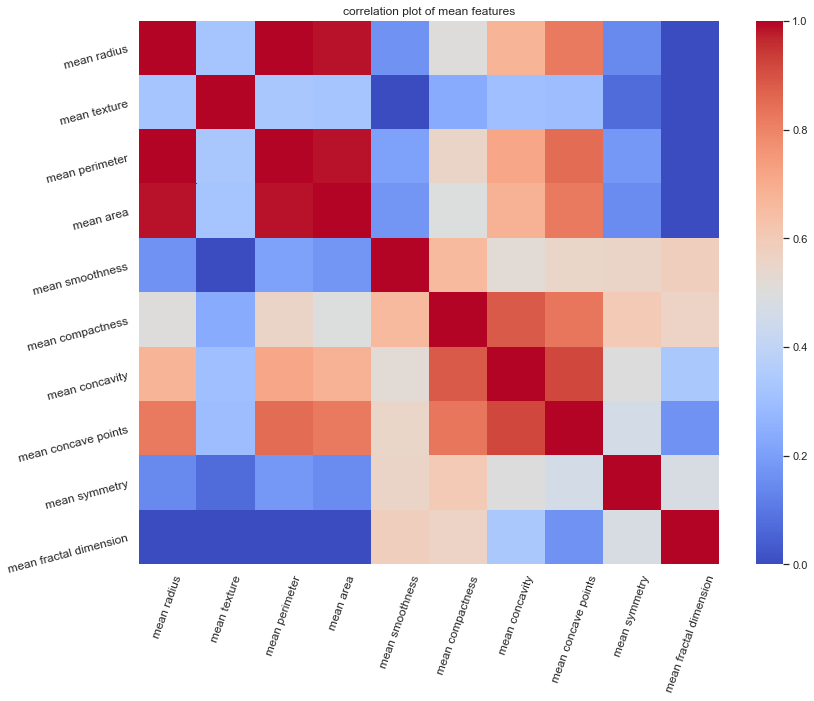

In [21]:
mean_corr = cancer_df[feature_mean].corr()

sns.set(style = 'white')

plt.figure(figsize = (13, 10))
g1 = sns.heatmap(mean_corr, cmap = 'coolwarm', vmin = 0, vmax = 1)
g1.set_xticklabels(g1.get_xticklabels(), rotation = 70, fontsize = 12)
g1.set_yticklabels(g1.get_yticklabels(), rotation = 15, fontsize = 12)
plt.title('correlation plot of mean features')
plt.show()

### 1.2 check some joint plots using seaborn

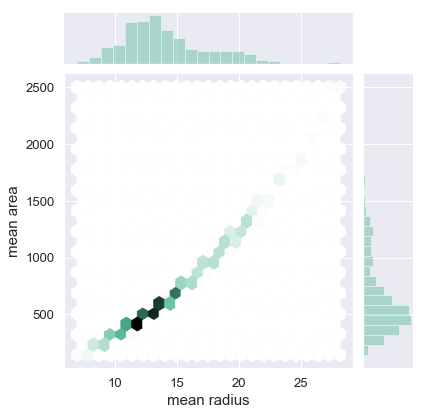

In [22]:
sns.set(font_scale = 1.2)
j = sns.jointplot(cancer_df['mean radius'], cancer_df['mean area'],
                  kind = 'hex', color = '#4CB391')
j.set_axis_labels('mean radius', 'mean area', fontsize = 15)

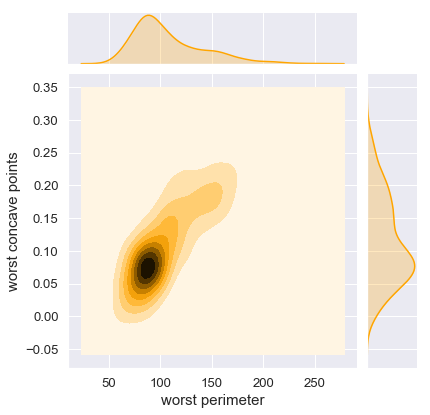

In [23]:
j2 = sns.jointplot(cancer_df['worst perimeter'], cancer_df['worst concave points'],
                   kind = 'kde', color = 'orange')
j2.set_axis_labels('worst perimeter', 'worst concave points', fontsize = 15)

In [24]:
cancer_df_labels = cancer_df.copy()
cancer_df_labels['labels'] = cancer.target
cancer_df_labels.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### 1.3 view pair plots to see some distributions

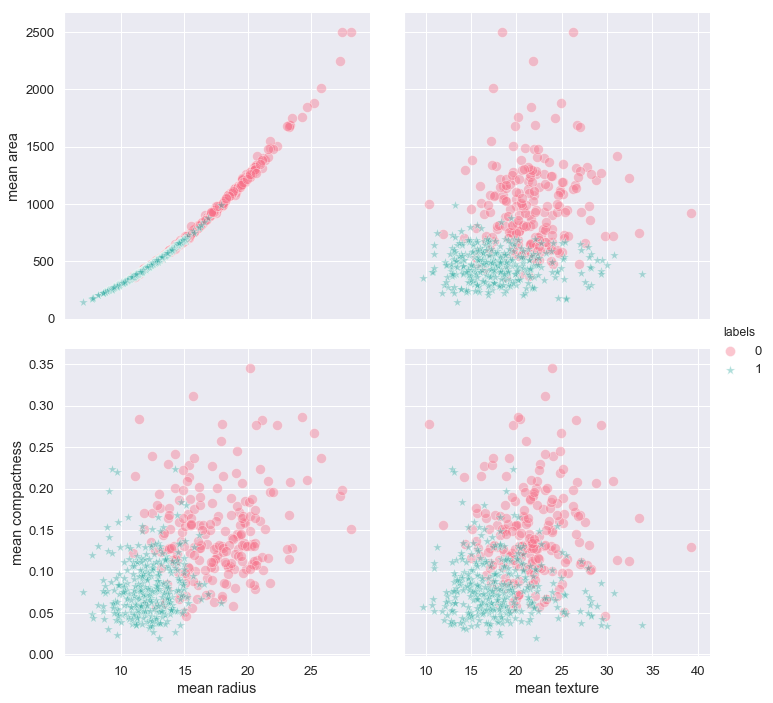

In [28]:
sns.pairplot(cancer_df_labels,
             x_vars = ["mean radius", "mean texture"],
             y_vars = ["mean area", "mean compactness"], 
             hue = 'labels', palette = "husl", 
             height = 5, markers = ['o', '*'], 
             plot_kws = dict(s = 100, alpha = 0.4))

## 2. Prepare to Use the Pipeline Built on PCA, SVM, GridSearchCV
### 2.1 Train and Test Data Separation

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.25,
                                                    stratify = cancer.target, random_state = 30)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### 2.2 prepare the pipeline steps

In [30]:
# 1. normalizing the features with standardscaler
# 2. applying principal component analysis
# 3. use svm to classify malignant and benign samples

#### 2.2.1 first check the effect of pca

In [32]:
scaler1 = StandardScaler().fit(cancer.data)
feature_scaled = scaler1.transform(cancer.data)

pca1 = PCA(n_components = 4).fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)

np.shape(feature_scaled_pca)

(569, 4)

In [33]:
# variance: which contributing most
feat_var = np.var(feature_scaled_pca, axis = 0)
feat_var_rat = feat_var / (np.sum(feat_var))
feat_var_rat

array([0.55871858, 0.23941873, 0.11854291, 0.08331978])

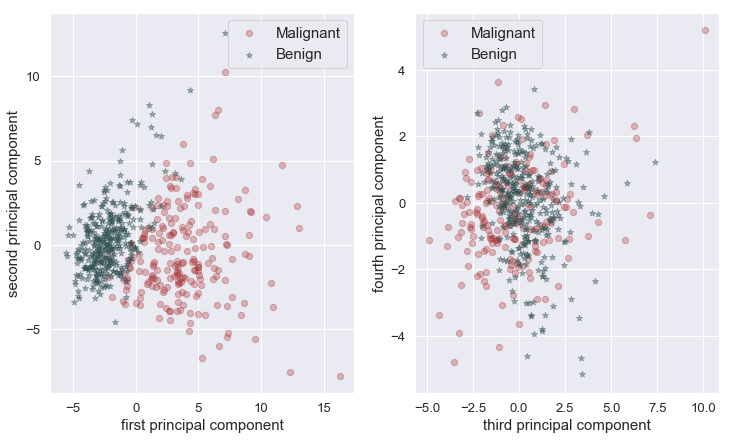

In [37]:
# As we can see sum of the first two components are contributing almost 80% of the total variance. 
# So it would be interesting to plot these compnents and see how separated the sampels are.
labels = cancer.target.tolist()
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
for l in np.unique(labels):
    i = np.where(labels == l)
    plt.scatter(feature_scaled_pca[:,0][i],
                feature_scaled_pca[:,1][i],
                c = colordict[l],
                label = piclabel[l],
                s = 40,
                marker = markers[l],
                alpha = alphas[l])
    plt.xlabel('first principal component', fontsize = 15)
    plt.ylabel('second principal component', fontsize = 15)
    plt.legend(fontsize = 15)

plt.subplot(1, 2, 2)
for l in np.unique(labels):
    i = np.where(labels == l)
    plt.scatter(feature_scaled_pca[:,2][i],
                feature_scaled_pca[:,3][i],
                c = colordict[l],
                label = piclabel[l],
                s = 40,
                marker = markers[l],
                alpha = alphas[l])
    plt.xlabel('third principal component', fontsize = 15)
    plt.ylabel('fourth principal component', fontsize = 15)
    plt.legend(fontsize = 15) 

#### 2.2.2 grid search cv and best fit parameters

In [38]:
pipe_steps = [('scaler', StandardScaler()),
              ('pca', PCA()),
              ('supvm', SVC(kernel = 'rbf'))]  # default = rbf, radial basis function

check_params = {'pca__n_components': [2],  # first and second
                'supvm__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],  # regularization
                'supvm__gamma': [0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
                # kernel coefficient for rbf, poly, sigmoid
               }

pipeline = Pipeline(pipe_steps)

In [39]:
from tqdm import tqdm_notebook as tqdm
import warnings

In [41]:
warnings.filterwarnings('ignore')

# i love you so much
for cv in tqdm(range(4, 6)):  # progress
    create_grid = GridSearchCV(pipeline, param_grid = check_params, cv = cv)
    create_grid.fit(X_train, Y_train)
    print('score for %d fold cv := %3.2f' % (cv, create_grid.score(X_test, Y_test)))
    print('!!best-fit parameters from training data!!')
    print(create_grid.best_params_)
# use the best one

  0%|          | 0/2 [00:00<?, ?it/s]

score for 4 fold cv := 0.94
!!best-fit parameters from training data!!
{'pca__n_components': 2, 'supvm__C': 40, 'supvm__gamma': 0.1}
score for 5 fold cv := 0.93
!!best-fit parameters from training data!!
{'pca__n_components': 2, 'supvm__C': 1, 'supvm__gamma': 0.5}


### 2.3 prediction and confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix

Y_pred = create_grid.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))

Text(0.5,1,'confusion matrix')

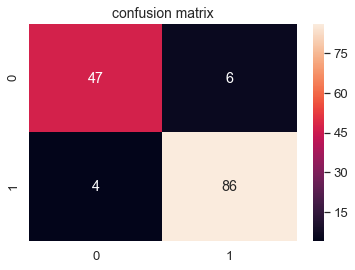

In [46]:
sns.heatmap(df_cm, annot = True)
plt.title('confusion matrix', fontsize = 14)

## 3. plot decision boudary

In [48]:
# test data: standard, pca, trained svm
scaler1 = StandardScaler().fit(X_test)
X_test_scaled = scaler1.transform(X_test)

pca2 = PCA(n_components = 2)
X_test_scaled_reduced = pca2.fit_transform(X_test_scaled)

svm_model = SVC(kernel = 'rbf', C = 1., gamma = 0.5)
classify = svm_model.fit(X_test_scaled_reduced, Y_test)

In [49]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print ('initial decision function shape; ', np.shape(Z))
    Z = Z.reshape(xx.shape)
    print ('after reshape: ', np.shape(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

initial decision function shape;  (40320,)
after reshape:  (192, 210)


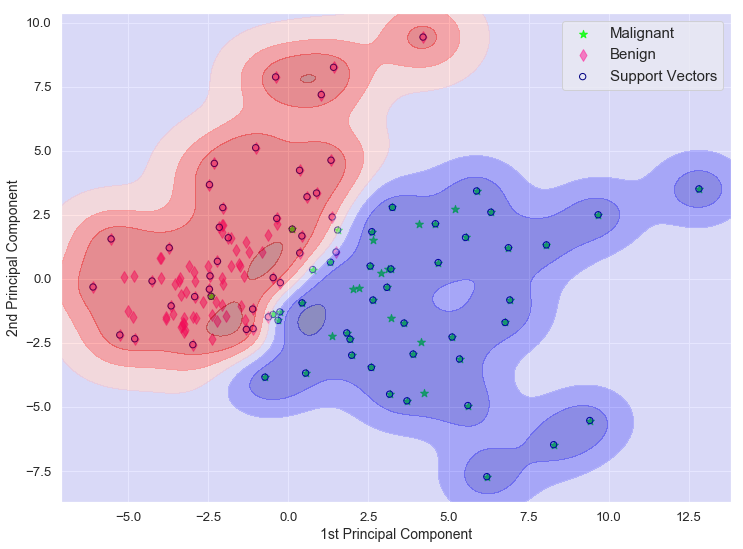

In [50]:
X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')

cdict1={0:'lime',1:'deeppink'}
alpha1={0:.8, 1:0.5}
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}

Y_tar_list = Y_test.tolist()
labels1 = [int(target1) for target1 in Y_tar_list]

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], 
               c=cdict1[l1],label=labl1[l1],
               s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], 
           svm_model.support_vectors_[:, 1], 
           s=40, facecolors='none', 
           edgecolors='navy', label='Support Vectors')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)
plt.show()